In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

In [2]:
# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

## Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ
1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
2. SMOTE-NC Îç∞Ïù¥ÌÑ∞
3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
4. Í∞ÄÏ§ëÏπò

Î™®Îç∏ÎßÅ Í≥ºÏ†ïÏùÄ Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏùºÎã® ÏßÑÌñâÎê®.

### 1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [3]:
train = pd.read_csv("data/train/train_undersample_4_5.csv")
val = pd.read_csv("data/train/validation.csv")
test = pd.read_csv("data/train/test.csv")

In [21]:
display(train)
display(val)
display(test)

SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN PROD_ONE_PLUS_YN  \
0              36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N                Y   
1              36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N                Y   
2              36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N                N   
3              36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N                N   
4              36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N                N   
...                ...          ...         ...         ...              ...   
53089          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N                N   
53090          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N                N   
53091          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N                Y   
53092          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N                N   
53093            6Í∞úÏõîÎØ∏Îßå          UHD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N                N   

      AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP PAID_CHNL_CNT_GRP  \
0              Ïû¨ÏïΩÏ†ï             N                0Í±¥                0Í±¥   
1               Ïã†Í∑ú             N                0Í±¥                0Í±¥   
2             ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥                0Í±¥   
3             ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥                0Í±¥   
4              Ïû¨ÏïΩÏ†ï             N                0Í±¥                0Í±¥   
...            ...           ...               ...               ...   
53089         ÏïΩÏ†ïÏäπÍ≥Ñ             Y                0Í±¥                0Í±¥   
53090         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥                0Í±¥   
53091          Ïû¨ÏïΩÏ†ï             N                0Í±¥                0Í±¥   
53092         ÏïΩÏ†ïÏäπÍ≥Ñ             Y                0Í±¥                0Í±¥   
53093           Ïã†Í∑ú             Y                0Í±¥                0Í±¥   

      SCRB_PATH_NM_GRP  INHOME_RATE   AGMT_END_SEG  TOTAL_USED_DAYS BUNDLE_YN  \
0                 ÌòÑÏû•Í≤ΩÎ°ú        10.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ             2498         Y   
1                 ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 1Í∞úÏõî~2Í∞úÏõî             1127         N   
2                 ÏùºÎ∞òÏÉÅÎã¥        60.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             4521         N   
3                 ÌòÑÏû•Í≤ΩÎ°ú        40.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2519         Y   
4                  ÏßÅÏòÅÎ™∞        40.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ             1684         Y   
...                ...          ...            ...              ...       ...   
53089              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2746         N   
53090              O/B        40.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2428         N   
53091              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ             3943         Y   
53092              O/B         0.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             3198         Y   
53093             ÌòÑÏû•Í≤ΩÎ°ú         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ               11         Y   

      DIGITAL_GIGA_YN DIGITAL_ALOG_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
0                   N               N      6.00                ÏùºÏ£ºÏùºÎÇ¥   
1                   N               N      2.00                ÏùºÏ£ºÏùºÎÇ¥   
2                   N               N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
3                   N               N      2.00                ÏùºÏ£ºÏùºÎÇ¥   
4                   N               N      3.00                ÏùºÏ£ºÏùºÎÇ¥   
...               ...             ...       ...                 ...   
53089               N               N      1.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
53090               N               N      2.00                ÏùºÏ£ºÏùºÎÇ¥   
53091               N   

sha2_hash  \
0        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
2        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
3        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
4        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                   ...   
1955113  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
1955114  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
1955115  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
1955116  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
1955117  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0           6     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1           6     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
2           6          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
3           6          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
4           6          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
...       ...              ...          ...         ...         ...   
1955113     6          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
1955114     6          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1955115     6      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1955116     6          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
1955117     6          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

        PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                      Y           Ïã†Í∑ú             N                0Í±¥   
1                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
2                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3                      Y           Ïã†Í∑ú             N                0Í±¥   
4                      Y           Ïã†Í∑ú             N                1Í±¥   
...                  ...          ...           ...               ...   
1955113                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1955114                N           Ïã†Í∑ú             N                1Í±¥   
1955115                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
1955116                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1955117                N           Ïã†Í∑ú             N                0Í±¥   

        PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                      0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
1                      0Í±¥              I/B        60.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
2                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 3~6Í∞úÏõî   
4                      1Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
...                   ...              ...          ...           ...   
1955113                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1955114                0Í±¥              O/B        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1955115                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1955116                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1955117                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

        AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA

sha2_hash  \
0        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
2        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
3        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
4        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                   ...   
1945590  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
1945591  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
1945592  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
1945593  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
1945594  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0          11     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1          11     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
2          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
3          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
4          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
...       ...              ...          ...         ...         ...   
1945590    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
1945591    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1945592    11      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1945593    11          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
1945594    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

        PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
2                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3                      Y           Ïã†Í∑ú             N                0Í±¥   
4                      Y           Ïã†Í∑ú             N                1Í±¥   
...                  ...          ...           ...               ...   
1945590                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1945591                N           Ïã†Í∑ú             N                1Í±¥   
1945592                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
1945593                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1945594                N           Ïã†Í∑ú             N                0Í±¥   

        PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                      0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1                      0Í±¥              I/B        70.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
2                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî   
4                      1Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
...                   ...              ...          ...           ...   
1945590                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945591                0Í±¥              O/B        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945592                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945593                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1945594                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

        AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITA

In [4]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object
object


In [5]:
# train = train.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
val = val.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ

In [7]:
categorical_cols = train.select_dtypes(include=['object']).columns

# TrainÏóêÎäî ÏóÜÍ≥† ValidationÏóêÎßå ÏûàÎäî Í∞í Ï∞æÍ∏∞
unseen_values = {}

for col in categorical_cols:
    train_unique = set(train[col].unique())
    val_unique = set(val[col].unique())

    unseen = val_unique - train_unique
    if unseen:
        unseen_values[col] = unseen

# Í≤∞Í≥º Ï∂úÎ†•
print(unseen_values)


{'PROD_NM_GRP': {'Í∏∞ÌÉÄ'}, 'AGMT_KIND_NM': {'Ï†ïÎ≥¥ÏóÜÏùå'}, 'INHOME_RATE': {'100.0'}, 'AGMT_END_SEG': {'Í∏∞ÌÉÄ'}}


In [8]:
val = val[val['PROD_NM_GRP'] != 'Í∏∞ÌÉÄ'].reset_index(drop=True)
test = test[test['PROD_NM_GRP'] != 'Í∏∞ÌÉÄ'].reset_index(drop=True)

val = val[val['AGMT_KIND_NM'] != 'Ï†ïÎ≥¥ÏóÜÏùå'].reset_index(drop=True)
test = test[test['AGMT_KIND_NM'] != 'Ï†ïÎ≥¥ÏóÜÏùå'].reset_index(drop=True)

val = val[val['INHOME_RATE'] != '100.0'].reset_index(drop=True)
test = test[test['INHOME_RATE'] != '100.0'].reset_index(drop=True)

val = val[val['AGMT_END_SEG'] != 'Í∏∞ÌÉÄ'].reset_index(drop=True)
test = test[test['AGMT_END_SEG'] != 'Í∏∞ÌÉÄ'].reset_index(drop=True)


In [9]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏàòÌñâ
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù


In [28]:
display(train)
display(val)
display(test)

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  PROD_OLD_YN  \
0                     2             0            3            0   
1                     2             0            3            0   
2                     2             0            0            0   
3                     2             0            4            0   
4                     2             0            3            0   
...                 ...           ...          ...          ...   
53089                 2             0            0            0   
53090                 2             0            0            0   
53091                 2             0            4            0   
53092                 2             0            4            0   
53093                 4             1            4            0   

       PROD_ONE_PLUS_YN  AGMT_KIND_NM  STB_RES_1M_YN  SVOD_SCRB_CNT_GRP  \
0                     1             5              0                  0   
1                     1             0              0                  0   
2                     0             2              0                  0   
3                     0             2              0                  0   
4                     0             5              0                  0   
...                 ...           ...            ...                ...   
53089                 0             2              1                  0   
53090                 0             2              0                  0   
53091                 1             5              0                  0   
53092                 0             2              1                  0   
53093                 0             0              1                  0   

       PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                      0                 9            1             1   
1                      0                 9            0             9   
2                      0                 4            6             8   
3                      0                 9            4             8   
4                      0                 8            4             1   
...                  ...               ...          ...           ...   
53089                  0                 0            0             8   
53090                  0                 1            4             8   
53091                  0                 0            0             1   
53092                  0                 1            0             8   
53093                  0                 9            0             1   

       TOTAL_USED_DAYS  BUNDLE_YN  DIGITAL_GIGA_YN  DIGITAL_ALOG_YN  TV_I_CNT  \
0                 2498          1                0                0      6.00   
1                 1127          0                0                0      2.00   
2                 4521          0                0                0      1.00   
3                 2519          1                0                0      2.00   
4                 1684          1                0                0      3.00   
...                ...        ...              ...              ...       ...   
53089             2746          0                0                0      1.00   
53090             2428          0                0                0      2.00   
53091             3943          1                0                0      4.00   
53092             3198          1                0                0      3.00   
53093               11          1                1                0      2.00   

       CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  VOC_STOP_CANCEL_MONTH1_YN  \
0                        4                    0                          0   
1                        4                    0                          0   
2                        4                    0                          0   
3                        4                    0                          0   
4                        4                    1              

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  PROD_OLD_YN  \
0                       1             0            3            0   
1                       1             0            4            0   
2                       2             0            0            0   
3                       2             0            3            0   
4                       2             0            4            0   
...                   ...           ...          ...          ...   
1955096                 2             0            0            0   
1955097                 2             0            3            0   
1955098                 0             0            3            0   
1955099                 2             1            0            0   
1955100                 2             0            0            0   

         PROD_ONE_PLUS_YN  AGMT_KIND_NM  STB_RES_1M_YN  SVOD_SCRB_CNT_GRP  \
0                       1             0              0                  0   
1                       0             5              0                  0   
2                       1             5              0                  0   
3                       1             0              0                  0   
4                       1             0              0                  1   
...                   ...           ...            ...                ...   
1955096                 0             5              0                  0   
1955097                 0             0              0                  1   
1955098                 0             2              0                  0   
1955099                 0             5              0                  0   
1955100                 0             0              0                  0   

         PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                        0                 0            0             6   
1                        0                 0            6             7   
2                        0                 4            1             1   
3                        0                 4            1            11   
4                        1                 9            0             8   
...                    ...               ...          ...           ...   
1955096                  0                 9            0             8   
1955097                  0                 1            1             8   
1955098                  0                 4            0             8   
1955099                  0                 0            2             1   
1955100                  0                 9            1             8   

         TOTAL_USED_DAYS  BUNDLE_YN  DIGITAL_GIGA_YN  DIGITAL_ALOG_YN  \
0                    855          1                1                0   
1                   4249          1                1                0   
2                   2488          1                0                0   
3                   1836          0                0                0   
4                   3826          1                0                0   
...                  ...        ...              ...              ...   
1955096             3446          0                0                0   
1955097             2128          1                0                0   
1955098             3805          0                0                0   
1955099             1399          1                0                0   
1955100             2276          0                0                0   

         TV_I_CNT  CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  \
0            3.00                    4                    0   
1            2.00                    4                    0   
2            6.00                    4                    0   
3            3.00                    4                    0   
4            4.00                    4                    0   
...           ...                  ...                  ...   
1955096      2.00                   

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  PROD_OLD_YN  \
0                       1             0            3            0   
1                       1             0            4            0   
2                       2             0            0            0   
3                       2             0            3            0   
4                       2             0            4            0   
...                   ...           ...          ...          ...   
1945579                 2             0            0            0   
1945580                 2             0            3            0   
1945581                 0             0            3            0   
1945582                 2             1            0            0   
1945583                 2             0            0            0   

         PROD_ONE_PLUS_YN  AGMT_KIND_NM  STB_RES_1M_YN  SVOD_SCRB_CNT_GRP  \
0                       1             5              0                  0   
1                       0             5              0                  0   
2                       1             5              0                  0   
3                       1             0              0                  0   
4                       1             0              0                  1   
...                   ...           ...            ...                ...   
1945579                 0             5              0                  0   
1945580                 0             0              0                  1   
1945581                 0             2              0                  0   
1945582                 0             5              0                  0   
1945583                 0             0              0                  0   

         PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                        0                 0            2             1   
1                        0                 0            7             6   
2                        0                 4            1             1   
3                        0                 4            1            13   
4                        1                 9            0             8   
...                    ...               ...          ...           ...   
1945579                  0                 9            0             8   
1945580                  0                 1            1             8   
1945581                  0                 4            0             8   
1945582                  0                 0            2             1   
1945583                  0                 9            0             8   

         TOTAL_USED_DAYS  BUNDLE_YN  DIGITAL_GIGA_YN  DIGITAL_ALOG_YN  \
0                   1008          1                1                0   
1                   4402          1                1                0   
2                   2641          1                0                0   
3                   1989          0                0                0   
4                   3979          1                0                0   
...                  ...        ...              ...              ...   
1945579             3599          0                0                0   
1945580             2281          1                0                0   
1945581             3958          0                0                0   
1945582             1552          1                0                0   
1945583             2429          0                0                0   

         TV_I_CNT  CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  \
0            3.00                    4                    0   
1            2.00                    4                    0   
2            6.00                    4                    0   
3            3.00                    4                    0   
4            4.00                    4                    1   
...           ...                  ...                  ...   
1945579      2.00                   

Robust Ïä§ÏºÄÏùºÎßÅ Ìï† Ïª¨Îüº ÏÑ§Ï†ï
- TOTAL_USED_DAYS
- CH_HH_AVG_MONTH1
- KIDS_USE_PV_MONTH1
- CH_25_RATIO_1MONTH

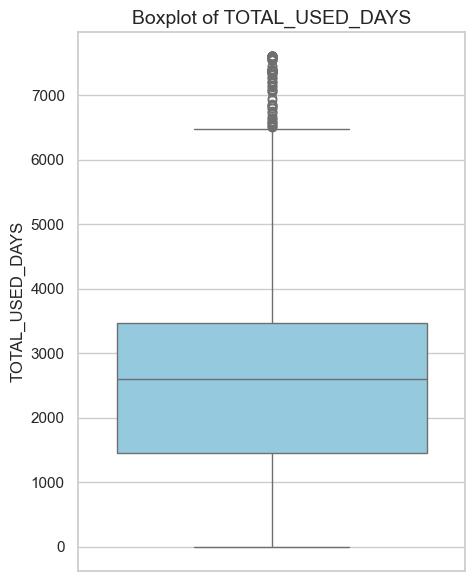

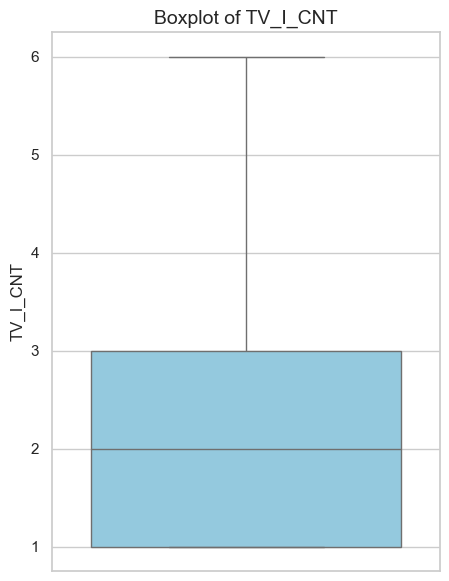

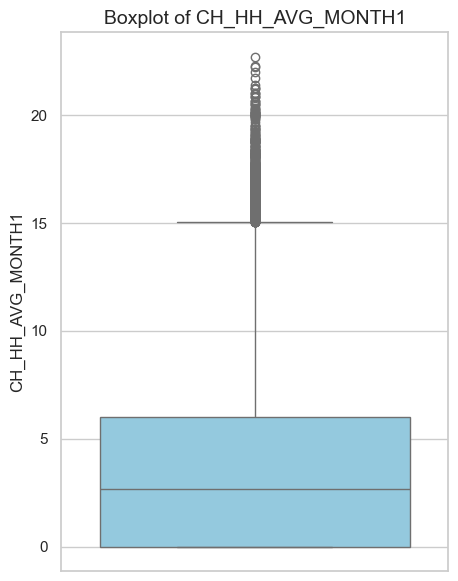

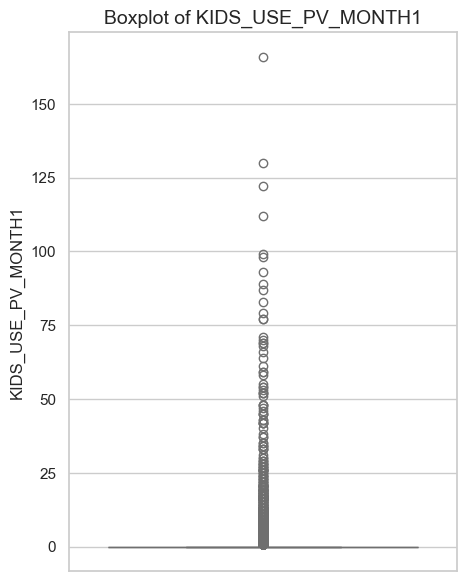

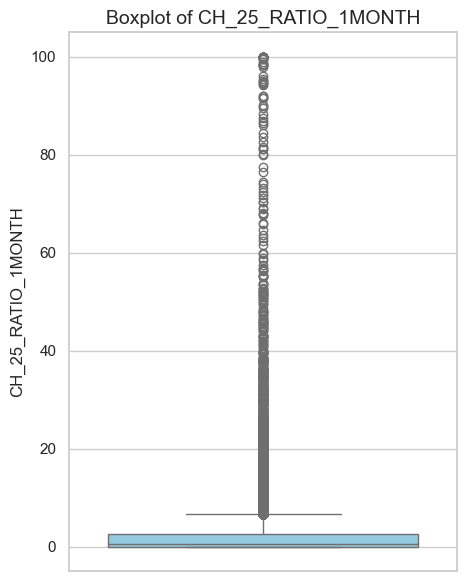

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# dfÏóêÏÑú Ïó∞ÏÜçÌòï(ÏàòÏπòÌòï) Î≥ÄÏàò Ï∞æÍ∏∞
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Seaborn Ïä§ÌÉÄÏùº Ï†ÅÏö©
sns.set(style="whitegrid")

# Í∞Å Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ boxplot ÏÉùÏÑ± (ÏÑ∏Î°ú Î∞©Ìñ•)
for col in numeric_columns:
    plt.figure(figsize=(5, 7))  # ÏÑ∏Î°úÎ°ú Í∏∏Í≤å ÏÑ§Ï†ï
    sns.boxplot(y=train[col], color="skyblue")  # ÏÑ∏Î°ú Î∞©Ìñ• boxplot

    # Ï†úÎ™© Î∞è ÎùºÎ≤® Ï∂îÍ∞Ä
    plt.ylabel(col, fontsize=12)
    plt.title(f'Boxplot of {col}', fontsize=14)

    # Í∑∏ÎûòÌîÑ ÌëúÏãú
    plt.show()


In [10]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ÎÇ¥Í∞Ä Ï†ïÌïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")


robust, minmax ÎÅù


In [31]:
train.to_csv("data/train/randomunder_modeling/train.csv", index=False)
val.to_csv("data/train/randomunder_modeling/val.csv", index=False)
test.to_csv("data/train/randomunder_modeling/test.csv", index=False)

In [11]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
#
model = LogisticRegression(solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Validation Accuracy: 0.76

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.76      0.86   1941849
           1       0.02      0.68      0.04     13252

    accuracy                           0.76   1955101
   macro avg       0.51      0.72      0.45   1955101
weighted avg       0.99      0.76      0.86   1955101


Confusion Matrix (Validation):
[[1479287  462562]
 [   4240    9012]]


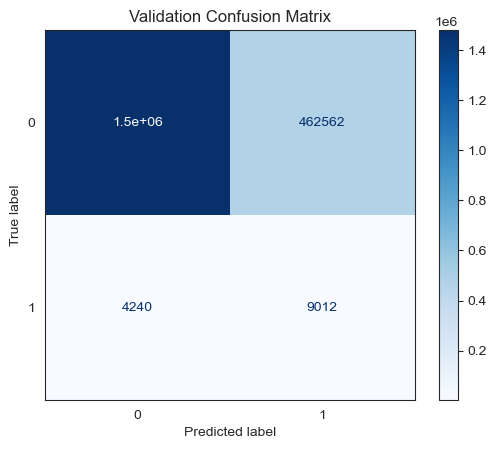

Validation AUC-ROC: 0.80


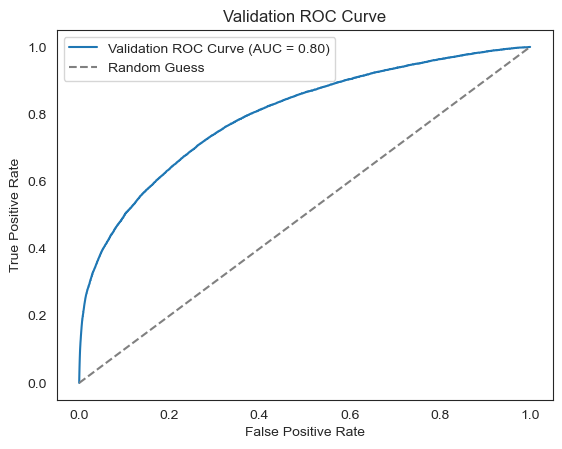

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, val_predictions))
disp_val = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, val_predictions), display_labels=model.classes_)

# Confusion Matrix
plt.figure()
disp_val.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Validation Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
val_probabilities = model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(False)
plt.show()


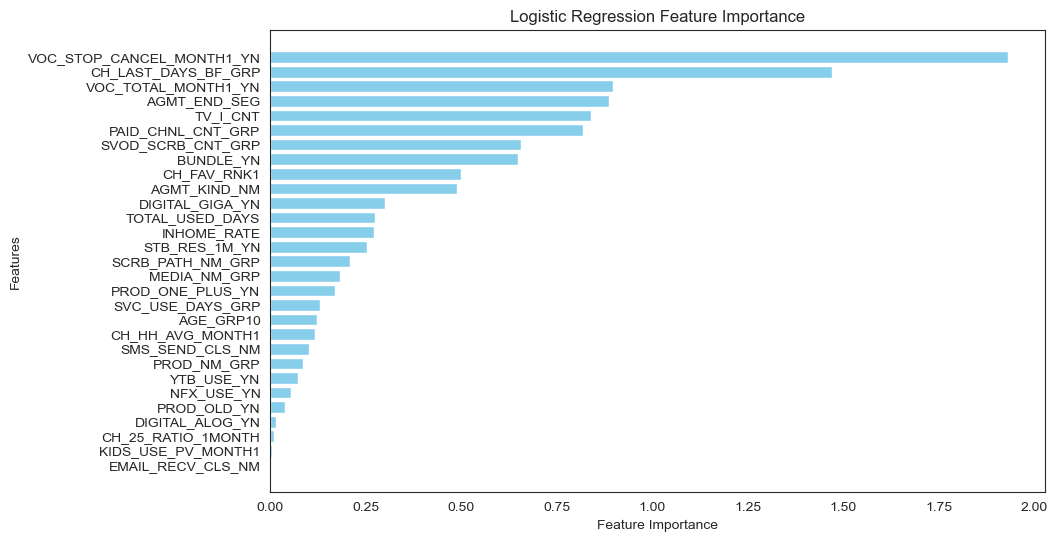

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance Ï∂îÏ∂ú (Ï†àÎåìÍ∞í ÏÇ¨Ïö©)
feature_importance = np.abs(model.coef_[0])

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()


---

### 2. SMOTE-NC Îç∞Ïù¥ÌÑ∞Î°ú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [14]:
train = pd.read_csv("data/train/train_smotenc_4_5.csv")
val = pd.read_csv("data/train/validation.csv")
test = pd.read_csv("data/train/test.csv")

In [15]:
train = train.drop(columns=['KIDS_USE_YN'])
val = val.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

In [16]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object
object


Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ

In [17]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏàòÌñâ
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù


In [18]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ÎÇ¥Í∞Ä Ï†ïÌïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [9]:
train.to_csv("data/train/smote_modeling/train.csv", index=False)
val.to_csv("data/train/smote_modeling/val.csv", index=False)
test.to_csv("data/train/smote_modeling/test.csv", index=False)

In [19]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
#
model = LogisticRegression(solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Validation Accuracy: 0.74

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.74      0.85   1941866
           1       0.02      0.59      0.03     13252

    accuracy                           0.74   1955118
   macro avg       0.51      0.67      0.44   1955118
weighted avg       0.99      0.74      0.85   1955118


Confusion Matrix (Validation):
[[1443174  498692]
 [   5395    7857]]


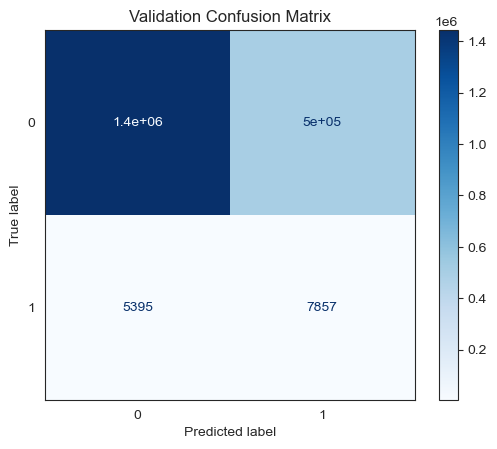

Validation AUC-ROC: 0.72


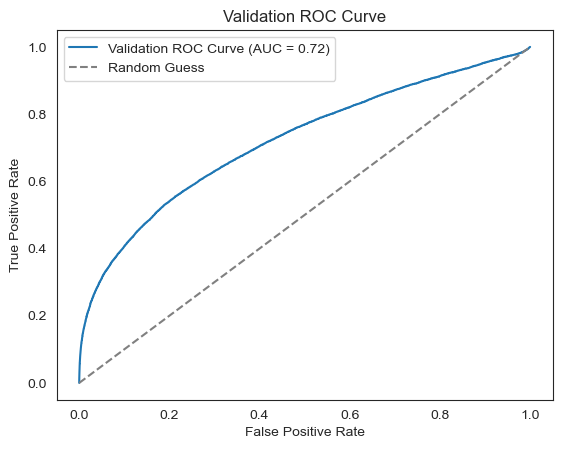

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, val_predictions))
disp_val = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, val_predictions), display_labels=model.classes_)

# Confusion Matrix
plt.figure()
disp_val.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Validation Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
val_probabilities = model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(False)
plt.show()


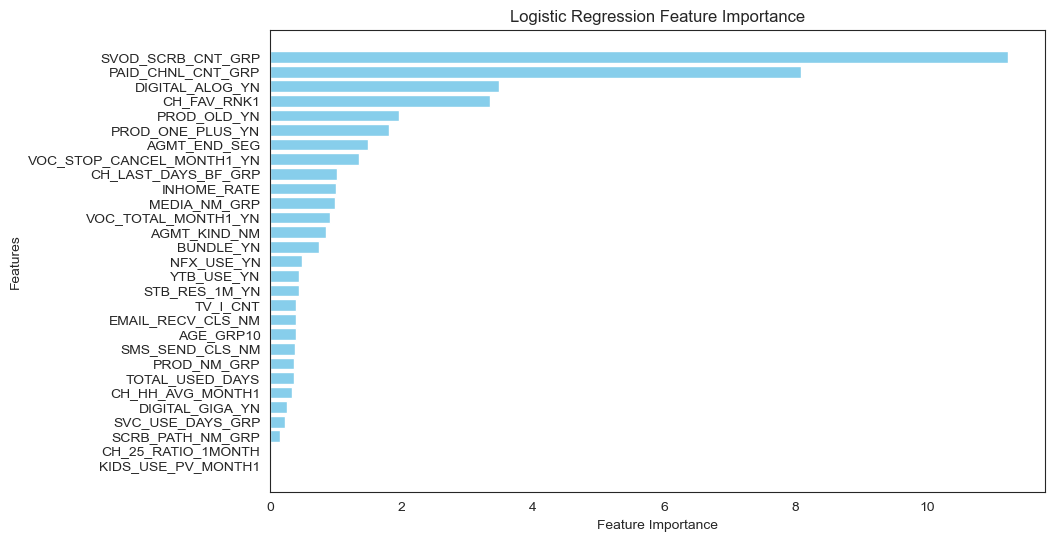

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [22]:
train = pd.read_csv("data/train/train_randomunder_smotenc_4_5.csv")
val = pd.read_csv("data/train/validation.csv")
test = pd.read_csv("data/train/test.csv")

In [23]:
train = train.drop(columns=['KIDS_USE_YN'])
val = val.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

In [24]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object
object


Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ

In [25]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏàòÌñâ
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù


In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ÎÇ¥Í∞Ä Ï†ïÌïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [20]:
train.to_csv("data/train/smoterandom_modeling/train.csv", index=False)
val.to_csv("data/train/smoterandom_modeling/val.csv", index=False)
test.to_csv("data/train/smoterandom_modeling/test.csv", index=False)

In [27]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
model = LogisticRegression(solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Validation Accuracy: 0.79

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1941866
           1       0.02      0.55      0.03     13252

    accuracy                           0.79   1955118
   macro avg       0.51      0.67      0.46   1955118
weighted avg       0.99      0.79      0.88   1955118


Confusion Matrix (Validation):
[[1537846  404020]
 [   5945    7307]]


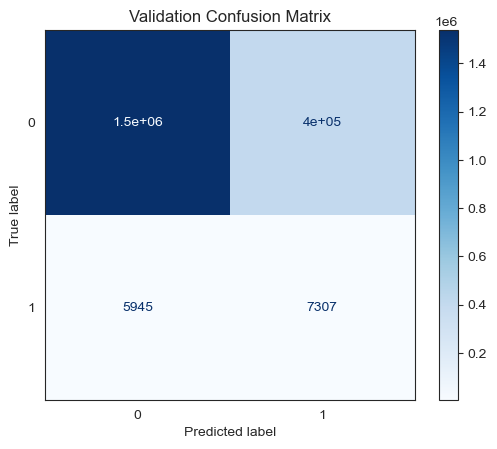

Validation AUC-ROC: 0.72


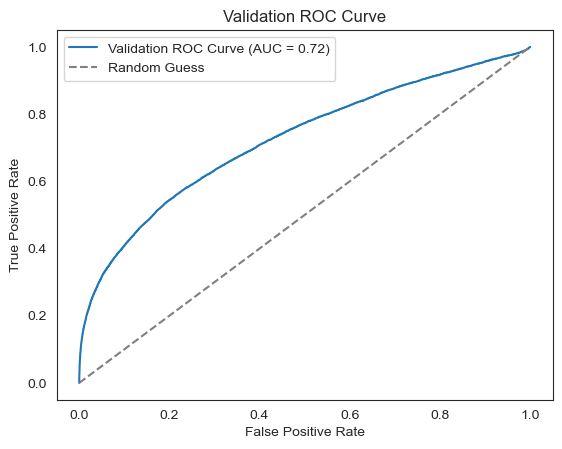

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, val_predictions))
disp_val = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, val_predictions), display_labels=model.classes_)

# Confusion Matrix
plt.figure()
disp_val.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Validation Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
val_probabilities = model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(False)
plt.show()


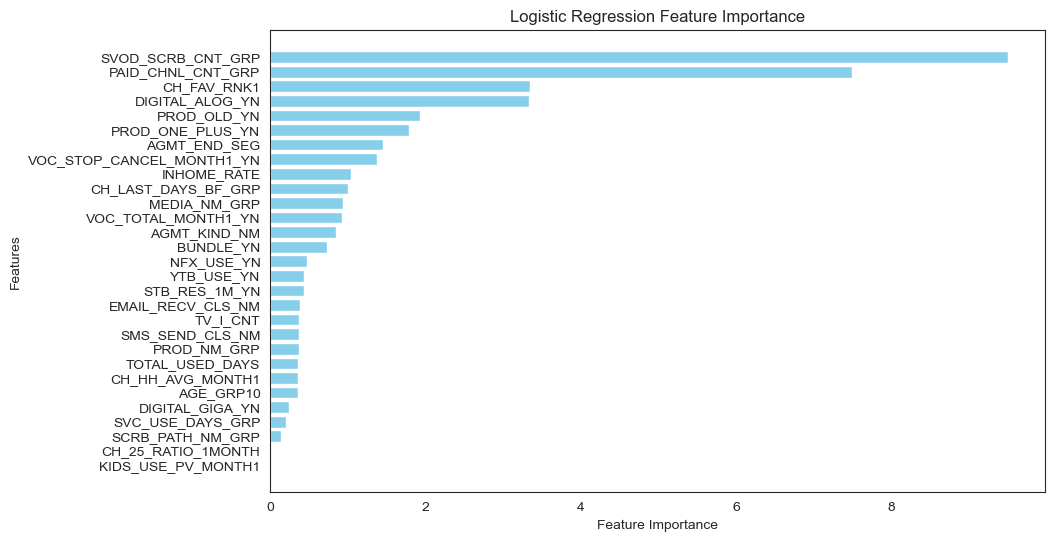

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 4. Í∞ÄÏ§ëÏπòÎ°ú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [30]:
# trainÏùÄ 4,5Ïõî Îç∞Ïù¥ÌÑ∞

train = pd.read_csv("data/train/train.csv")
val = pd.read_csv("data/train/validation.csv")
test = pd.read_csv("data/train/test.csv")

In [31]:
val = val.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

In [32]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object
object


In [33]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏàòÌñâ
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù


In [34]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ÎÇ¥Í∞Ä Ï†ïÌïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [35]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Validation Accuracy: 0.76

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.76      0.86   1941866
           1       0.02      0.69      0.04     13252

    accuracy                           0.76   1955118
   macro avg       0.51      0.72      0.45   1955118
weighted avg       0.99      0.76      0.86   1955118


Confusion Matrix (Validation):
[[1471765  470101]
 [   4159    9093]]


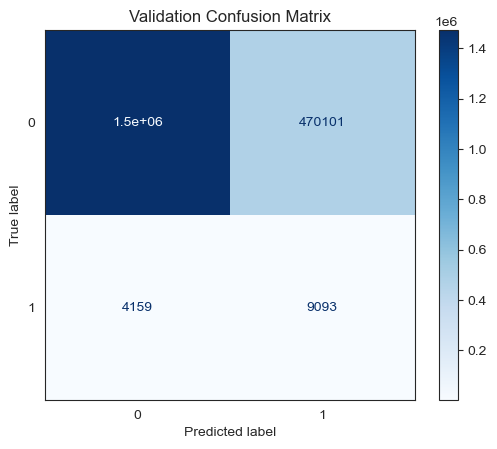

Validation AUC-ROC: 0.80


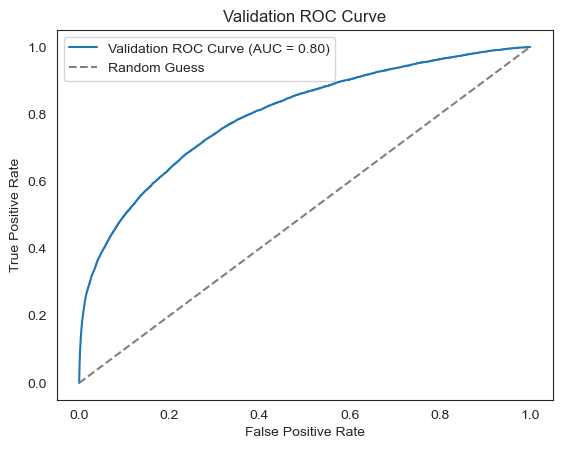

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_val, val_predictions))
disp_val = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, val_predictions), display_labels=model.classes_)

# Confusion Matrix
plt.figure()
disp_val.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Validation Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
val_probabilities = model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(False)
plt.show()


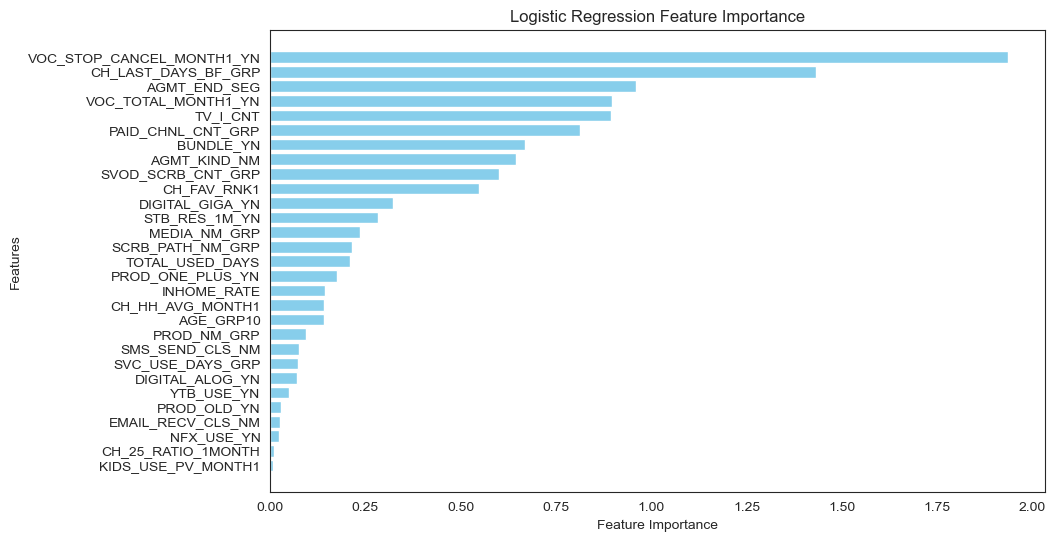

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### Í≤∞Î°†
Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî ÎûúÎç§ Ïñ∏Îçî ÎòêÎäî Í∞ÄÏ§ëÏπòÎ•º ÌñàÏùÑ Îïå, Í∞ÄÏû• Ï¢ãÎã§

### üìå Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏÑ±Îä• ÎπÑÍµê (Sampling Í∏∞Î≤ïÎ≥Ñ)

| ÏÉòÌîåÎßÅ Í∏∞Î≤ï             | Accuracy | 1Ïùò Recall | ROC-AUC |
|------------------------|----------|-----------|---------|
| <span style="color:red;">**ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ**</span>     | 0.76     | 0.68      | 0.80    |
| **SMOTE**              | 0.74     | 0.59      | 0.72    |
| **SMOTE + ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ** | 0.79     | 0.55      | 0.72    |
| <span style="color:red;">**Í∞ÄÏ§ëÏπò Ï°∞Ï†ï**</span>         | 0.76     | 0.69      | 0.80    |

